In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#### **Load the forest fires dataset**

In [299]:
forest_fires_df = pd.read_csv("/kaggle/input/forestfires/forestfires.csv")
forest_fires_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


#### **Plot a scatter plot to visualize the relationship between temperature and burned area**

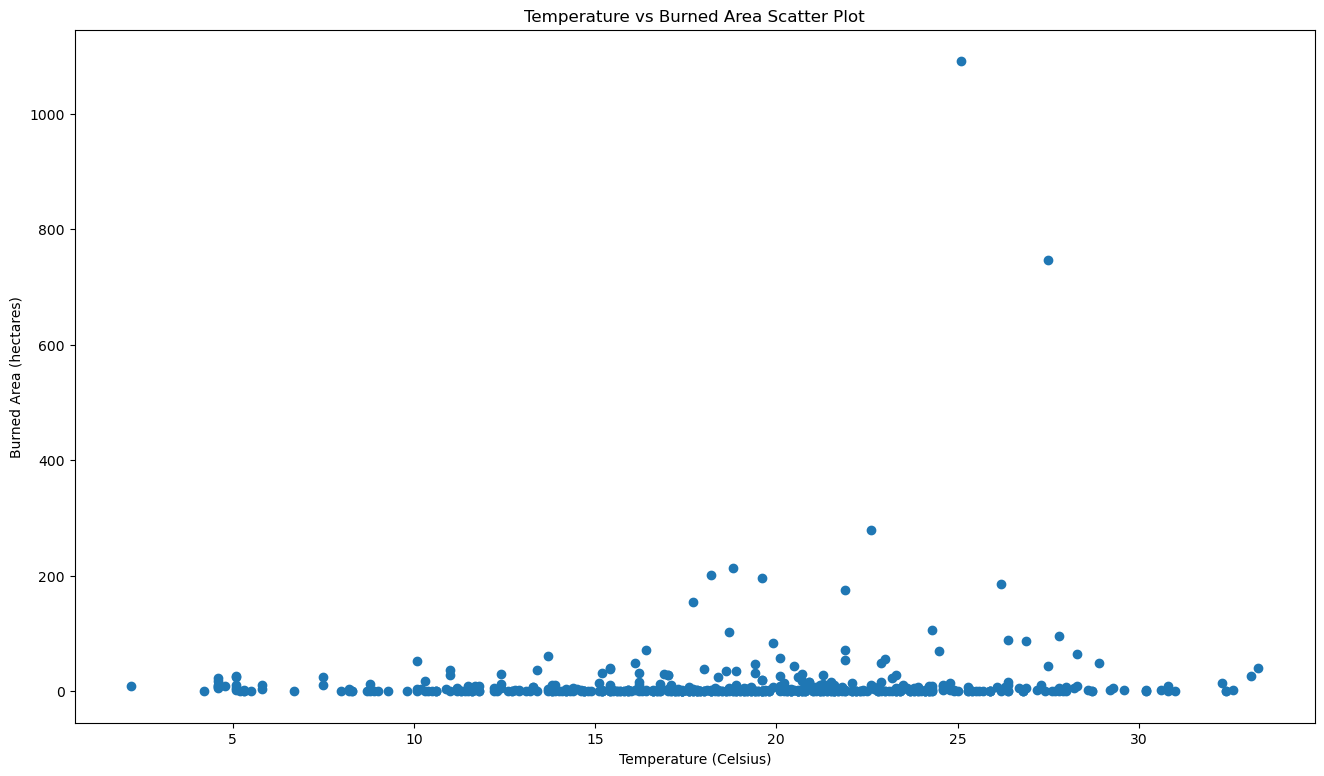

In [300]:
plt.figure(figsize =(16, 9))
plt.scatter(forest_fires_df['temp'], forest_fires_df['area'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Burned Area (hectares)')
plt.title('Temperature vs Burned Area Scatter Plot')
plt.show()

#### **Plot a boxplot to visualize the distribution of burned area**

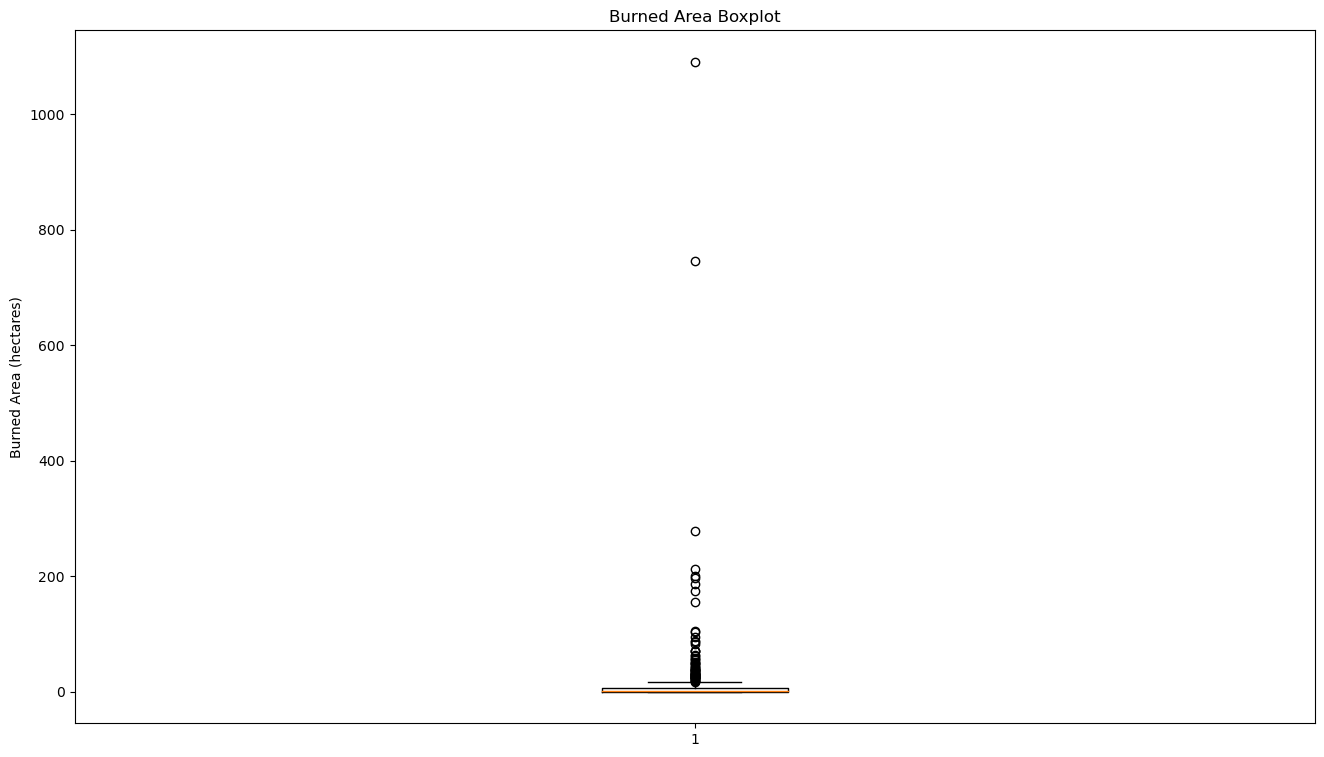

In [301]:
plt.figure(figsize =(16, 9))
plt.boxplot(forest_fires_df['area'])
plt.ylabel('Burned Area (hectares)')
plt.title('Burned Area Boxplot')
plt.show()

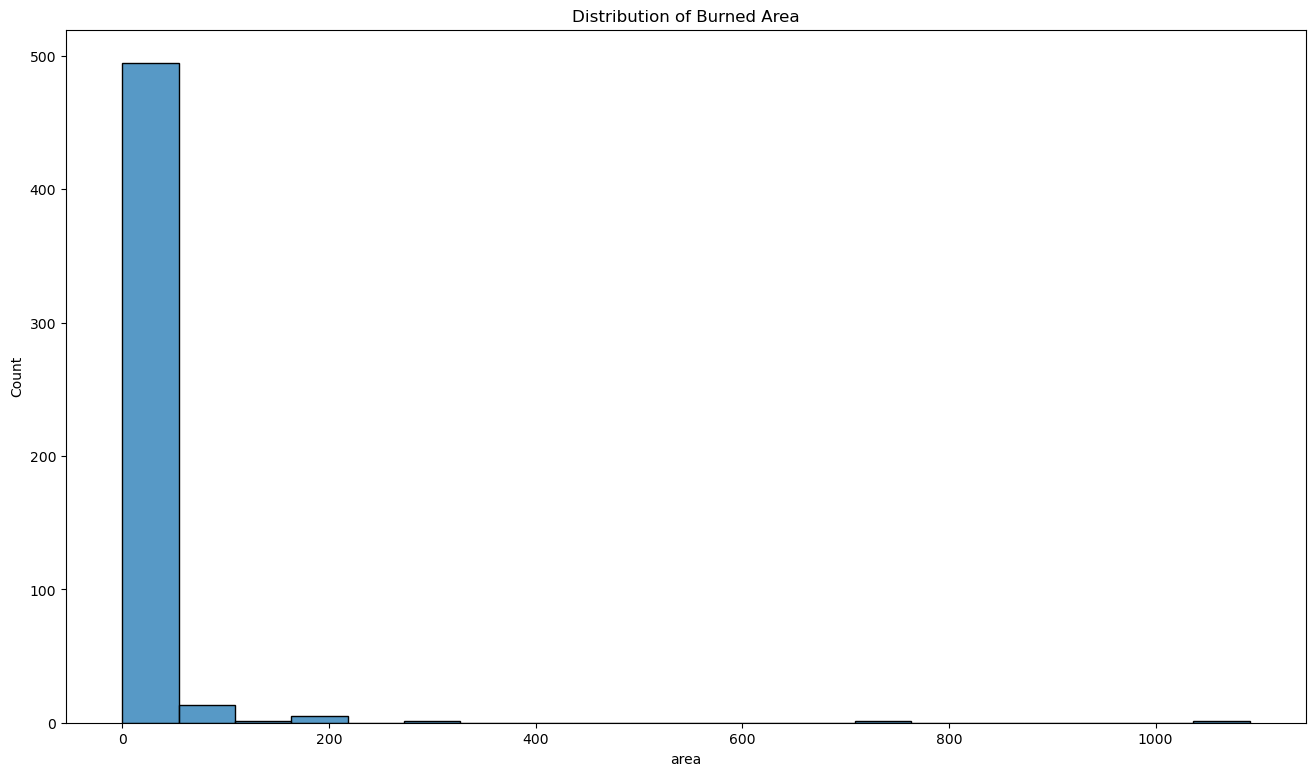

In [302]:
plt.figure(figsize =(16, 9))
sns.histplot(data=forest_fires_df, x='area', bins=20)
plt.title('Distribution of Burned Area')
plt.show()

#### **Plot a bar chart to visualize the number of forest fires by month**

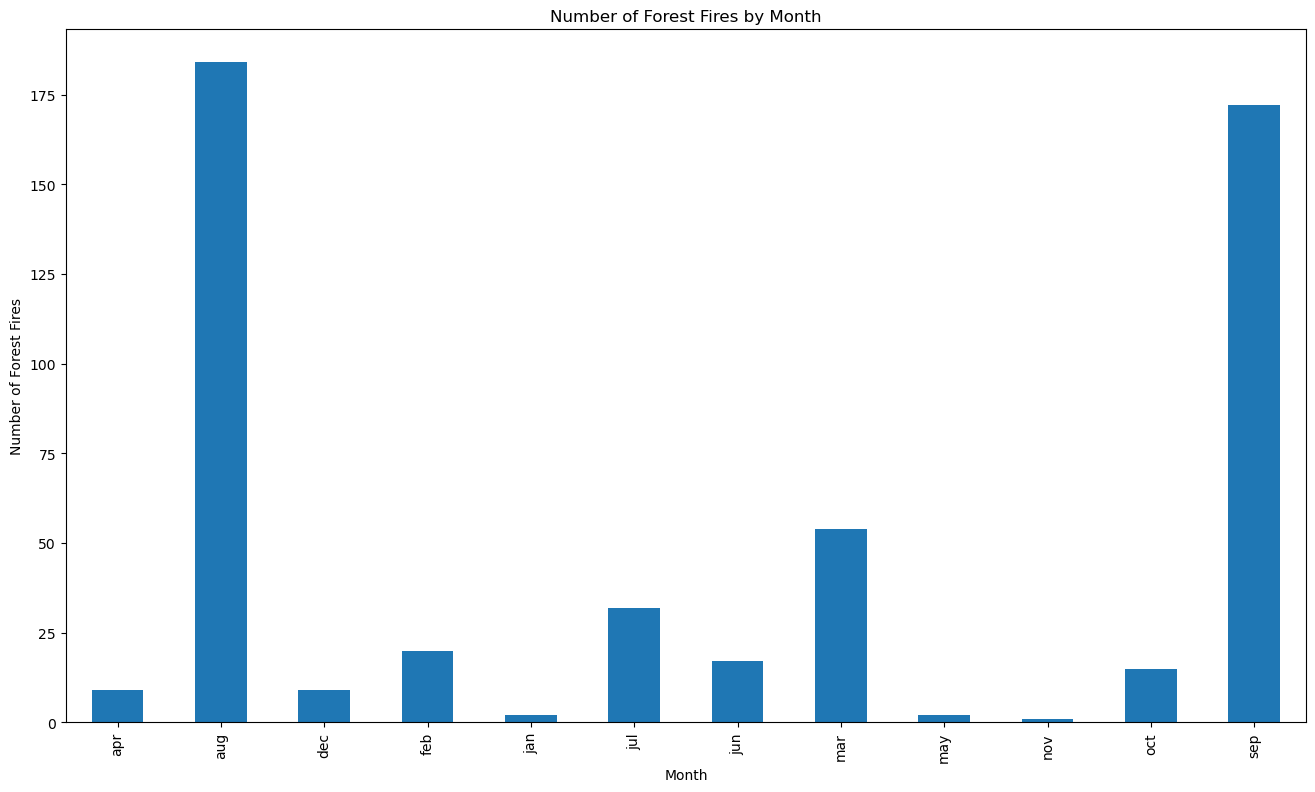

In [303]:
plt.figure(figsize =(16, 9))
fires_by_month = forest_fires_df.groupby('month').size()
fires_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Forest Fires')
plt.title('Number of Forest Fires by Month')
plt.show()

#### **Convert categorical variable 'size_category' to one-hot encoding**

In [304]:
size_category_df = pd.get_dummies(forest_fires_df['size_category'], prefix='size_category')
forest_fires_df = pd.concat([forest_fires_df, size_category_df], axis=1)
forest_fires_df.drop(['size_category','month','day'], axis=1, inplace=True)
forest_fires_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_large,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1


#### **Split the dataset into features and target variable**

In [305]:
X = forest_fires_df.drop(['area'], axis=1).values
y = forest_fires_df['area'].values


#### **Split the data into training and testing sets**

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Convert the input and output arrays to float32 data type**

In [307]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#### **Define the neural network architecture**

In [308]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

#### **Compile the model**

In [309]:
model.compile(loss='mean_squared_error', optimizer='adam')

#### **Train the model**

In [310]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 3045.3020
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 3024.4221
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 2767.0454
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 2730.6174
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 2387.5913
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 2409.9509
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 2385.4326
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 2295.3796
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 2179.2793
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 2307.9915
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 2256.3076
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 2284.7146
E

#### **Evaluate the model on the testing set**

In [311]:
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)

4/4 [==============================] - 0s 2ms/step - loss: 11954.6729
Mean Squared Error: 11954.6728515625
